<h2><b>You have been tasked to build at-least two models to identify hand written digits and recommend the best one to be deployed.

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()

In [18]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<h2><b>Since the Target Variable are categorical variables we will apply logistic regression algorithms

In [19]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<h3><b>Checking the images and its corresponding target variables of 1-10 rows

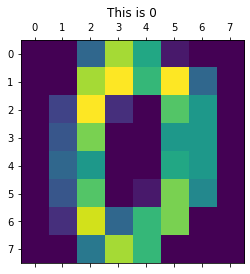

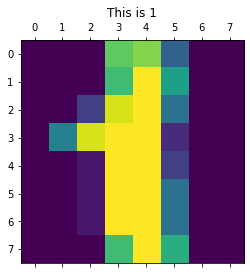

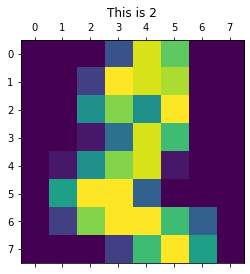

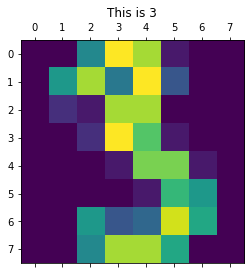

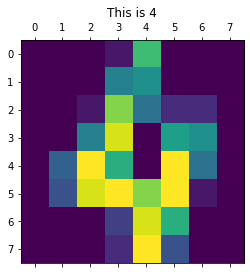

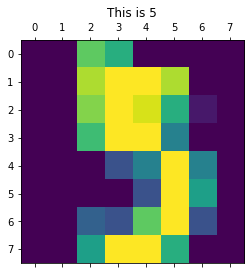

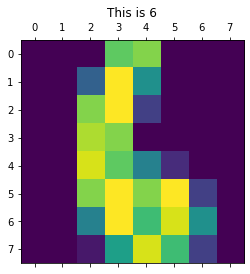

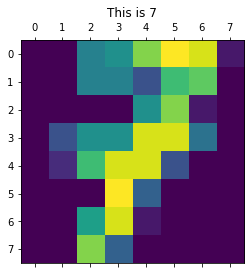

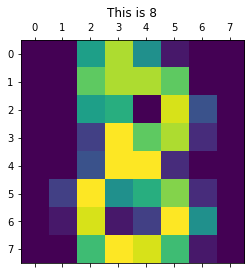

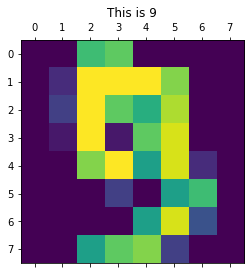

In [20]:
import matplotlib.pyplot as plt
for i in range(10):
    #plt.figsize=(20,10)
    plt.matshow(digits.images[i]) 
    plt.title('This is '+str(digits.target[i]))
    plt.show()

In [21]:
digits.feature_names[55:-1]

['pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6']

In [22]:
import pandas as pd
df=pd.DataFrame(digits.data)
df.columns=digits.feature_names
df['target'] = digits['target']

df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [23]:
df[df.duplicated()]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target


<h3><b>The Dataset is already cleaned and there are no duplicates. Also further EDA cannot be applied as images are alreadyc onvered to structured data


<h2><b>MODEL 1 : Support Vector Machine

<h4> checking sample size

In [24]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
n_samples = len(digits.images)
n_samples

1797

In [25]:
n_features=len(digits.feature_names)
n_features

64

Creating array of features and samples

splitting data for training the model

In [26]:
data = digits.images.reshape((n_samples, n_features))

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=True,random_state=20)

In [27]:
type(data)

numpy.ndarray

In [28]:
X_train.shape,y_test.shape,X_test.shape,y_train.shape

((1437, 64), (360,), (360, 64), (1437,))

<h3>Fitting the model for prediction

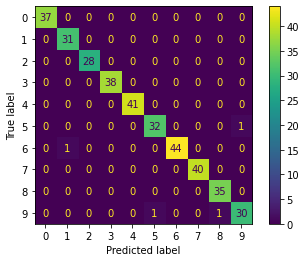

In [29]:
clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test) 

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
acc = accuracy_score(predicted,y_test)
cm=confusion_matrix(predicted,y_test)
report=classification_report(y_test, predicted, digits=2)
print('acc:{}\ncm:\n{}\nreport:\n{}'.format(round(acc*100,2),cm,report))

acc:98.89
cm:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  1  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0  0  0 35  1]
 [ 0  0  0  0  0  1  0  0  0 30]]
report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        41
           5       0.97      0.97      0.97        33
           6       1.00      0.98      0.99        45
           7       1.00      1.00      1.00        40
           8       0.97      1.00      0.99        35
           9       0.97      0.94      0.95        32

    accuracy                           0.99       3

In [31]:
X_test.shape # checking the X_test shape

(360, 64)

In [32]:
#predicted[10]
X_test =X_test.reshape(360, 8, 8) # reshaping it to visualise the input


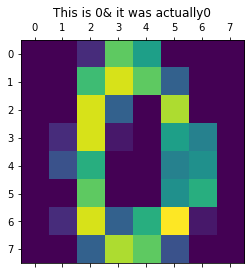

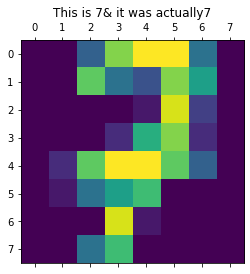

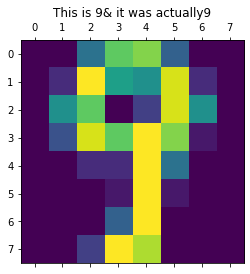

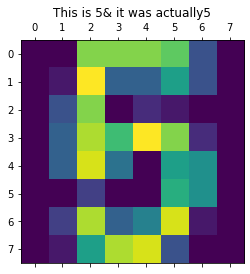

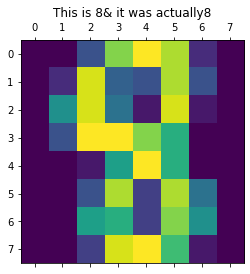

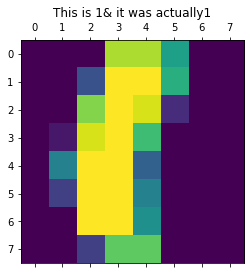

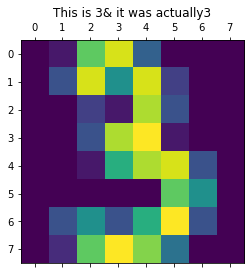

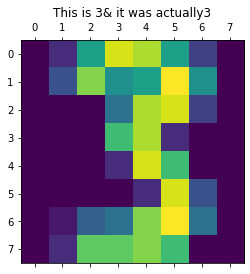

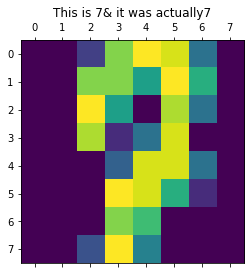

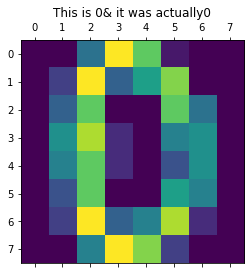

In [33]:
for i in range(10): # visualising 1-10 rows of predicted vs actual values
    #plt.figsize=(20,10)
    plt.matshow(X_test[i]) 
    plt.title('This is '+str(predicted[i])+'& it was actually'+ str(y_test[i]))
    plt.show()

In [34]:
for i in range(len(y_test)): # checking wrongly predicted values
    if y_test[i]!=predicted[i]:
        print(y_test[i],predicted[i])

9 8
5 9
6 1
9 5


In [35]:
# Spot Check Algorithms

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1:].values,test_size=0.2,random_state=6)
models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))

models.append(('NB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train.ravel(), cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, round(cv_results.mean()*100,2), cv_results.std()))

LDA: 95.060000 (0.017383)
KNN: 98.470000 (0.012339)
NB: 84.620000 (0.030391)


<h2> <b>Implementing k-nearest neighbors as it has highest score of accuracy

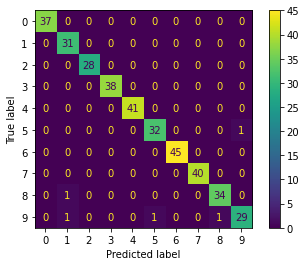

In [36]:
clf2 = KNeighborsClassifier()

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=True,random_state=20)
clf2.fit(X_train, y_train)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf2,X_test,y_test) 

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
predicted1 = clf2.predict(X_test)
acc = accuracy_score(predicted1,y_test)
cm=confusion_matrix(predicted1,y_test)
report=classification_report(y_test, predicted1, digits=2)
print('acc:{}\ncm:\n{}\nreport:\n{}'.format(round(acc*100,2),cm,report))

acc:98.61
cm:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  1  1]
 [ 0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  1]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0  0  0 34  1]
 [ 0  0  0  0  0  1  0  0  0 29]]
report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.94      1.00      0.97        31
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        41
           5       0.97      0.97      0.97        33
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        40
           8       0.97      0.97      0.97        35
           9       0.97      0.91      0.94        32

    accuracy                           0.99       3

In [38]:
wrong1=[] # getting wrongly predicted values
for i in range(len(y_test)):
    if y_test[i]!=predicted1[i]:
        print(y_test[i],predicted1[i],i)
        wrong1.append(i)


9 1 85
9 8 98
5 9 111
9 5 351
8 1 359


In [39]:
wrong1

[85, 98, 111, 351, 359]

<h3><b>Wrong Predictions after k-nearest neighbors

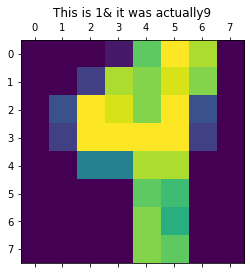

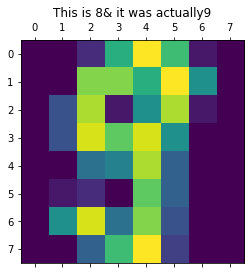

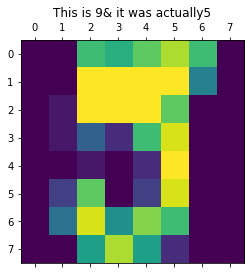

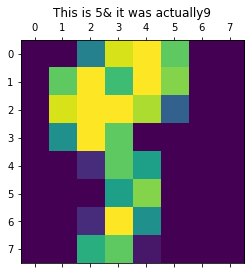

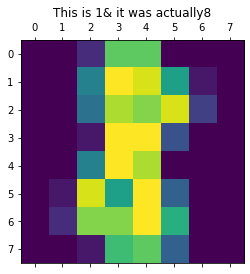

In [40]:
X1_test =X_test.reshape(360, 8, 8) #visualising wrongly predicted values in KNN
for i in wrong1:
    #plt.figsize=(20,10)
    plt.matshow(X1_test[i]) 
    plt.title('This is '+str(predicted1[i])+'& it was actually'+ str(y_test[i]))
    plt.show()

In [41]:
wrong=[]
for i in range(len(y_test)):
    if y_test[i]!=predicted[i]:
        print(y_test[i],predicted[i],i)
        wrong.append(i)
print(wrong)

9 8 98
5 9 111
6 1 278
9 5 351
[98, 111, 278, 351]


<h3><b>Wrong Predictions after SVM

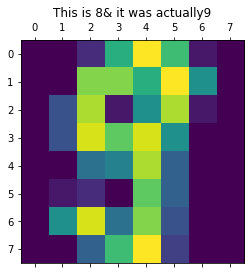

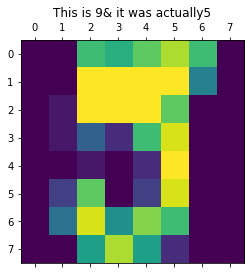

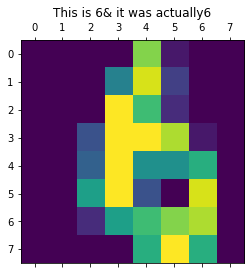

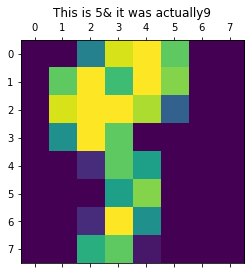

In [42]:
X1_test =X_test.reshape(360, 8, 8) #visualising wrongly predicted values in KNN
for i in wrong:
    #plt.figsize=(20,10)
    plt.matshow(X1_test[i]) 
    plt.title('This is '+str(predicted1[i])+'& it was actually'+ str(y_test[i]))
    plt.show()

<h2> <b> Conclusion SVM performed better with a 99% accuracy than KNN which has an accuracy of 98%